Bike sharing linear regression
---

Exercise - Load train/test sets & remove collinear features
---

> **Exercise**: Load the train/test sets into the `X_tr`, `y_tr`, `X_te` and `y_te` variables. Remove features that make the `X_tr` matrix, with the additional column of ones, rank deficient. Also, you might want to remove nearly collinear features if they hurt performance.

**Self-assessment**: Verify that the `X_tr` matrix with the additional column of ones has full rank. Compute its condition number.

In [83]:
import pandas as pd
import numpy as np

df_tr = pd.read_csv('data/bike-train.csv')
df_te = pd.read_csv('data/bike-test.csv')

df_tr.head(1)

,temp,temp_C,hum,windspeed,atemp,atemp_C,yr,workingday,holiday,casual
0,0.368,9.296,0.569,0.148,0.379,9.014,1,1,0,1603


In [95]:
# Extract X/y Numpy variables
X_tr = df_tr.drop(['casual'],axis=1).values
y_tr = df_tr.casual.values

X_te = df_te.drop('casual',axis=1).values
y_te = df_te.casual.values

# Verify that X_tr with the additional column of ones has full rank

rank = np.linalg.matrix_rank(X_tr)
print("Rank of the X_tr matrix:", rank)
print("Number of features:", X_tr.shape[1])

print("Rank is deficient, remove temp_C column")

X_tr = df_tr.drop(['casual','temp_C'],axis=1).values
rank = np.linalg.matrix_rank(X_tr)
print("Rank of the X_tr matrix:", rank)
print("Number of features:", X_tr.shape[1])

print("Rank is OK now")


# Compute its condition number
cond = np.linalg.cond(X_tr)
print("Condition score of X_tr matrix:", cond)
print("Condition score is too high, let's remove atemp_C column")

X_tr = df_tr.drop(['casual','temp_C','atemp_C'],axis=1).values
cond = np.linalg.cond(X_tr)
print("Condition score of X_tr matrix:", cond)

print("Condiditon score is OK")

# Do remove the same columns on the X_te matrix
X_te = df_te.drop(['casual','temp_C','atemp_C'],axis=1).values

Rank of the X_tr matrix: 8
Number of features: 9
Rank is deficient, remove temp_C column
Rank of the X_tr matrix: 8
Number of features: 8
Rank is OK now
Condition score of X_tr matrix: 964.1228749881127
Condition score is too high, let's remove atemp_C column
Condition score of X_tr matrix: 66.69182242605036
Condiditon score is OK


Exercise - Fit a linear regression model
---

> **Exercise**: (A) Fit a linear regression model to the `X_tr`, `y_tr` variables. Evaluate its performance on the test set using the mean absolute error (MAE). (B) Also, try fitting a linear regression with the Huber loss. (C) Pick one feature (e.g., temperatures) and plot the predictions from your best model (e.g., temperature vs. casual users plot).

**Note**: Your models might predict a negative number of users. In this case, you might want to set a lower limit with the Numpy `maximum()` function to improve performance, e.g. `y_pred = np.maximum(y_pred, 50)`.

In [96]:
# Compare models with mean absolute error (MAE)
def MAE(y, y_pred):
    return int(np.mean(np.abs(y-y_pred)))

MAE with Linear Regression: 288
MAE with Huber Loss Regression: 278
Will use Huber Loss model, coef =  [2053.32243515 -637.98010638 -970.69154175 -184.60991047  167.20093985
 -811.87750841 -330.55448401]


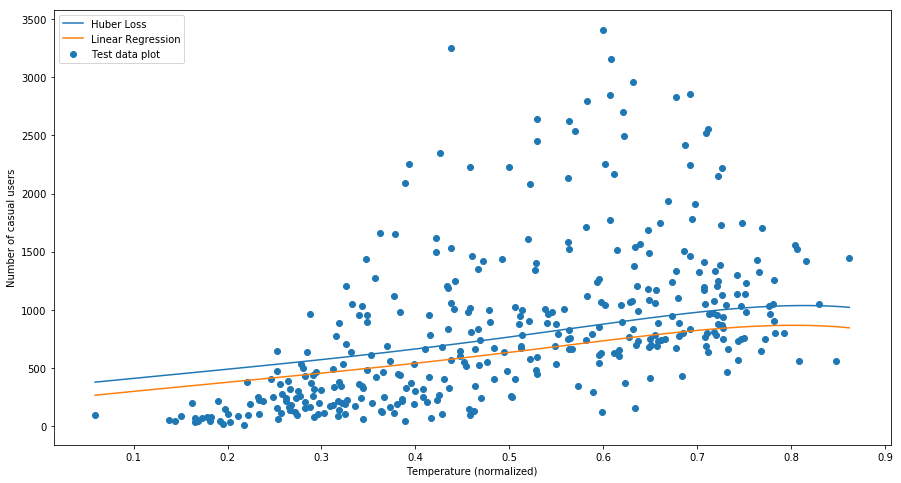

In [98]:
# (A) Fit and evaluate a linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_tr,y_tr)
y_pred_lr = lr.predict(X_te)

print("MAE with Linear Regression:",MAE(y_te,y_pred_lr))

# (B) Same with Huber loss
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(epsilon=1.1)
huber.fit(X_tr,y_tr)
y_pred_huber = huber.predict(X_te)

print("MAE with Huber Loss Regression:", MAE(y_te, y_pred_huber))

# (C) Plot best model

import matplotlib.pyplot as plt
%matplotlib inline

x_te = df_te['temp'].values


plt.figure(figsize=(15,8))
plt.scatter(x_te, y_te, label='Test data plot')


print("Will use Huber Loss model, coef = ",huber.coef_)
x_values = np.linspace(min(x_te),max(x_te),num=100)
y_values_huber = np.polyval(huber.coef_,x_values)
y_values_lr = np.polyval(lr.coef_,x_values)

plt.plot(x_values, np.multiply(y_values_huber,-1), label='Huber Loss')
plt.plot(x_values, np.multiply(y_values_lr, -1),  label='Linear Regression')

plt.xlabel("Temperature (normalized)")
plt.ylabel("Number of casual users")
plt.legend(loc='upper left')
plt.show()



Exercise - Separate sources and fit two linear regressions
---

We saw in the course that we can identify two sources in the data.

1. Data points collected during working days
1. Data points collected during non-working days

The goal of this exercise is to create a model for each source and see whether this improves performance.

> **Exercise**: Create a model for each source and evaluate the overall performance on the test set using MAE. Compare your models to a baseline using a bar chart.

In [ ]:
# Separate data points from the two sources
...

# Create a model for each one
...

# Evaluate the overall performance using MAE
...

In [ ]:
# Compare your models to a baseline using a bar chart
...

Exercise - R^2 coefficient
---

> **Exercise**: Compute the $R^{2}$ coefficient of your different models on the test set.

In [ ]:
...